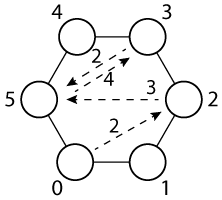

Imamo krožno ploščo s polji, oštevilčenimi od 0 do 5 (ker računalnikarji štejemo od 0 in ne od 1). Začnemo na polju 0 in mečemo kocko. Recimo, da vržemo najprej 2 (smo na polju 2), nato 3 (smo na polju 5), nato 4 (smo na polju 3, ker je plošča - za razliko od Zemlje - okrogla), nato vržemo 2 (spet smo na polju 5) ...

## Obvezna naloga

Napišite program, ki simulira takšno igro in izpiše število metov, po katerem pridemo stotič na polje 5.

Kocko bomo simulirali takole:

```python
from random import *
seed(8)
```

Po tem bo vsak klic funkcije `randint(1, 6)` vrnil naključno število med 1 in 6.

Program

```python
print(randint(1, 6))
print(randint(1, 6))
print(randint(1, 6))
print(randint(1, 6))
```

izpiše (slučajno ravno)

```
2
3
4
2
```

Ker bo kocka padala vedno enako (zaradi `seed(8)`, ki nastavi generator naključnih števil na neko začetno stanje; namesto 8 bi lahko uporabili poljubno drugo število in potem dobili drugačno, a spet vedno enako, zaporedje naključnih števil) , lahko izdam, kaj mora izpisati program: 626.

### Rešitev

Pojdimo lepo počasi. Najprej samo izpišimo deset metov.

In [1]:
from random import *
seed(8)

metov = 0
while metov < 10:
    met = randint(1, 6)
    print(met)
    metov += 1

2
3
4
2
2
6
1
1
2
2


Zdaj pa izpisujmo še pozicijo figure. Ta se po vsakem metu poveča za toliko, kolikor smo vrgli.

In [2]:
from random import *
seed(8)

metov = 0
pozicija = 0

while metov < 10:
    met = randint(1, 6)
    pozicija = pozicija + met
    print(met, pozicija)
    metov += 1

2 2
3 5
4 9
2 11
2 13
6 19
1 20
1 21
2 23
2 25


To očitno ne bo v redu: največja številka polja je 5, nato pridemo okrog, torej moramo zmanjšati pozicijo za 6.

In [3]:
from random import *
seed(8)

metov = 0
pozicija = 0

while metov < 10:
    met = randint(1, 6)
    pozicija = pozicija + met
    if pozicija > 5:
        pozicija -= 6
    print(met, pozicija)
    metov += 1

2 2
3 5
4 3
2 5
2 1
6 1
1 2
1 3
2 5
2 1


Isto se da doseči tudi na preprostejši način: uporabimo ostanek po deljenju.

In [4]:
from random import *
seed(8)

metov = 0
pozicija = 0

while metov < 10:
    met = randint(1, 6)
    pozicija = (pozicija + met) % 6
    print(met, pozicija)
    metov += 1

2 2
3 5
4 3
2 5
2 1
6 1
1 2
1 3
2 5
2 1


Če je `pozicija + met` več kot `5`, bo imel `% 6` enak učinek kot odštevanje `6`. Če je `pozicija + met` manjša od `6`, pa `% 6` ne bo storil ničesar.

Zdaj pa moramo šteti, kolikokrat smo se znašli na polju 5. Za to potrebujemo še eno spremenljivko.

In [5]:
from random import *
seed(8)

metov = 0
pozicija = 0
na_5 = 0

while metov < 10:
    met = randint(1, 6)
    pozicija = (pozicija + met) % 6
    if pozicija == 5:
        na_5 += 1
    print(met, pozicija, na_5)
    metov += 1

2 2 0
3 5 1
4 3 1
2 5 2
2 1 2
6 1 2
1 2 2
1 3 2
2 5 3
2 1 3


Izpis je videti pravilen: tretja številka je najprej 0, ko se prvič znajdemo na polju 5, se spremeni v 1, ko drugič, na 2, in potem ostane 2, dokler ne pridemo tretjič na polje 5.

Zdaj, ko vidimo, da to deluje, popravimo pogoj pri zanki `while`: namesto da izvede deset metov, mora teči toliko časa, dokler `na_5` ne doseže 100. V zanki ne bomo več ničesar izpisovali, pač pa po zanki izpišemo število metov.

In [6]:
from random import *
seed(8)

metov = 0
pozicija = 0
na_5 = 0

while na_5 < 100:
    met = randint(1, 6)
    pozicija = (pozicija + met) % 6
    if pozicija == 5:
        na_5 += 1
    metov += 1
    
print(metov)

690


In to je rešitev naše naloge.

#### Tipične napake

Tipični trdovratnejši napaki sta bili dve.

Nekateri niso znali pravilno postaviti pogoja pri `while`. Videl sem pogoje, ki so bili resnični vedno, na primer `while 0 <= pozicija <= 6` in pogoje, ki niso bili resnični v začetku, na primer `while na_5 == 100`. V prvem primeru se zanka nikoli ne ustavi, v drugem primeru se nikoli ne izvede. V prvem primeru so bili pogoji pogosto zelo čudni, kar morda namiguje na to, da nekateri niso vedeli, kaj bi napisali in so napisali ... kar nekaj, ker pogoj pač mora biti. Ta strategija programiranja navadno ni uspešna. :) Drugi primer kaže na manj nevarno napako, na nerazumevanje pomena pogoja. Zanka se izvaja, **dokler** je pogoj resničen in ne **do takrat,** ko se pogoj uresniči.

Druga pogosta napaka je bila tale. Študent namesto `pozicija = (pozicija + met) % 6` napiše pogoj in odštevanje, kot smo ga tudi v tej rešitve napisali na začetku, torej `pozicija = pozicija + met` in na to `if pozicija > 5: pozicija -= 6`. S tem ni še nič narobe. Pač pa so naredili napako v nadaljevanju.

In [7]:
from random import *
seed(8)

metov = 0
pozicija = 0
na_5 = 0

while na_5 < 100:
    met = randint(1, 6)
    pozicija += met
    if pozicija == 5:
        na_5 += 1
    if pozicija > 5:
        pozicija -= 6
    metov += 1
    
print(metov)

791


Ta program izpiše preveliko število potrebnih metov, 791. Študentom, ki so naredili to napako ter niso znali naprej in so mi pisali, sem svetoval, da pred pogoj `if pozicija == 5` dodajo `print(pozicija)`. V izpisu so se pojavljale številke večje od 5, kar jim je, upam, dalo razmisliti tole: do napake pride v primeru, da smo na polju 5 in vržemo 6. V tem primeru je `pozicija` enaka `11`. To je v resnici `5`, vendar ta program odšteje `6` šele *po tem*, ko preveri, ali je pozicija enaka 5.

Vrstni red pogojev je potrebno zamenjati: najprej popravimo pozicijo in šele nato primerjamo, ali je enaka 5.

In [8]:
from random import *
seed(8)

metov = 0
pozicija = 0
na_5 = 0

while na_5 < 100:
    met = randint(1, 6)
    pozicija += met
    if pozicija > 5:
        pozicija -= 6
    if pozicija == 5:
        na_5 += 1
    metov += 1
    
print(metov)

690


## Dodatna naloga

Funkcijo `seed` lahko v programu pokličemo večkrat in tako nastavljamo generator naključnih števil na različna začetna stanja. 

Napiši program, ki preveri vse možne začetne nastavitve od `0` do `999` in odigra igro. V vsaki igri bomo potrebovali različno število metov do stotega prihoda na polje 5. Program naj izpiše, kakšno je bilo minimalno število metov, potrebnih v eni od teh 1000 iger.

### Rešitev

Celoten program, razen `import`-a moramo zapreti v novo zanko, ki teče prek različnih semen. Za vsako seme, izvedemo notranjo zanko in preverimo, ali je število metov manjše od najmanjšega, ki smo ga videli doslej.

In [9]:
from random import *

najmanj = 1000000000
seme = 0
while seme < 1000:
    seed(seme)

    metov = 0
    pozicija = 0
    na_5 = 0

    while na_5 < 100:
        met = randint(1, 6)
        pozicija += met
        if pozicija > 5:
            pozicija -= 6
        if pozicija == 5:
            na_5 += 1
        metov += 1

    if metov < najmanj:
        najmanj = metov
        
    seme += 1

print(najmanj)

446


Zunanjo zanko `while` bomo nadomestili s `for`, vendar se o njej učimo šele v tednu po tej nalogi.